In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [35]:
data = pd.read_csv('./archive/abcnews-date-text.csv', usecols=["headline_text"], on_bad_lines='skip')
data.head()
data = data.sample(100000)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1066965 to 815900
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   headline_text  100000 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [37]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text')

,headline_text
909801,a league live streaming updates
933215,a league live streaming updates
870117,a league live streaming updates
913341,a league live streaming updates
937964,a league live streaming updates
...,...
611314,woman dies in driveway accident
624162,woman dies in highway crash
87113,woman dies in highway crash
847639,x x x


In [38]:
data = data.drop_duplicates('headline_text')

In [39]:
# TF-IDF

# punctuation
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', "%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

# Your text data
desc = data['headline_text'].values
vectorizer = TfidfVectorizer(stop_words=list(stop_words))

# Transforming your text data
X = vectorizer.fit_transform(desc)
word_features = vectorizer.get_feature_names_out()

print("The length of the vocabulary is: ", len(word_features))
print(word_features[5000:5100])

The length of the vocabulary is:  37894
['borne' 'borneo' 'boro' 'boroondara' 'borroloola' 'borrow' 'borrowed'
 'borrowers' 'borrowing' 'borrowings' 'borrows' 'borschmann' 'borussia'
 'bos' 'bosca' 'boscas' 'boshammer' 'boshoff' 'bosnia' 'bosnian' 'bosnich'
 'boson' 'bosque' 'boss' 'bosses' 'bosss' 'bossy' 'boston' 'boswell' 'bot'
 'botanic' 'botanical' 'botanists' 'botany' 'botched' 'botero' 'botha'
 'botham' 'bothe' 'bother' 'botox' 'botswana' 'bottle' 'bottled'
 'bottleneck' 'bottlenecks' 'bottles' 'bottleshop' 'bottling' 'bottlo'
 'bottoms' 'botulism' 'bouchard' 'boucher' 'boudaries' 'bougainville'
 'bought' 'boulder' 'boulevard' 'boulia' 'boully' 'boult' 'bounce'
 'bounceback' 'bouncer' 'bouncers' 'bounces' 'bouncing' 'bouncy' 'bound'
 'boundaries' 'boundary' 'boundless' 'bounty' 'bouquet' 'bourbon'
 'bourchier' 'bourdais' 'bourke' 'bourne' 'bout' 'boutique' 'bouzanis'
 'bovina' 'bovine' 'bovril' 'bow' 'bowden' 'bowditch' 'bowe' 'bowel'
 'bowen' 'bowerbirds' 'bowers' 'bowie' 'bowi

In [40]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [41]:
vectorizer2 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names_out()
print(len(word_features2))
print(word_features2[:50]) 

e:\Anaconda\envs\LMH\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
e:\Anaconda\envs\LMH\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 

26213
["'a" "'i" 'aa' 'aaa' 'aac' 'aaco' 'aacta' 'aagaard' 'aagard' 'aalto'
 'aamer' 'aami' 'aant' 'aapt' 'aaron' 'ab' 'abaaoud' 'abalon' 'abandon'
 'abar' 'abat' 'abattoir' 'abb' 'abba' 'abbattoir' 'abberton' 'abbey'
 'abbot' 'abbotsford' 'abbott' 'abbottsay' 'abc' 'abcc' 'abcmyphoto'
 'abcnew' 'abcrageuri' 'abdallah' 'abdel' 'abdelhamid' 'abdelmalek'
 'abdeslam' 'abdic' 'abduct' 'abductor' 'abdul' 'abdullah' 'abe' 'abeb'
 'abedin' 'abercrombi']


In [42]:
vectorizer3 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names_out()

In [43]:
# KMeans

wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    print('Cluster ', i, ' done')
    print('WCSS: ', kmeans.inertia_)



Cluster  1  done
WCSS:  95304.5292434563
Cluster  2  done
WCSS:  94801.3242284582
Cluster  3  done
WCSS:  94438.62167900639
Cluster  4  done
WCSS:  94089.52355947644
Cluster  5  done
WCSS:  94049.6762165439
Cluster  6  done
WCSS:  93817.87927500815
Cluster  7  done
WCSS:  93411.02768823913
Cluster  8  done
WCSS:  92730.7867833941
Cluster  9  done
WCSS:  92463.2647632928
Cluster  10  done
WCSS:  92715.79862693395
Cluster  11  done
WCSS:  92225.62495175724
Cluster  12  done
WCSS:  92280.41053879229
Cluster  13  done
WCSS:  91837.33073709779
Cluster  14  done
WCSS:  91109.38940158367
Cluster  15  done
WCSS:  91083.1923037672
Cluster  16  done
WCSS:  91201.35776345905
Cluster  17  done
WCSS:  90685.38960435856
Cluster  18  done
WCSS:  90784.3639419272
Cluster  19  done
WCSS:  90695.40588734555
Cluster  20  done
WCSS:  90056.226640988


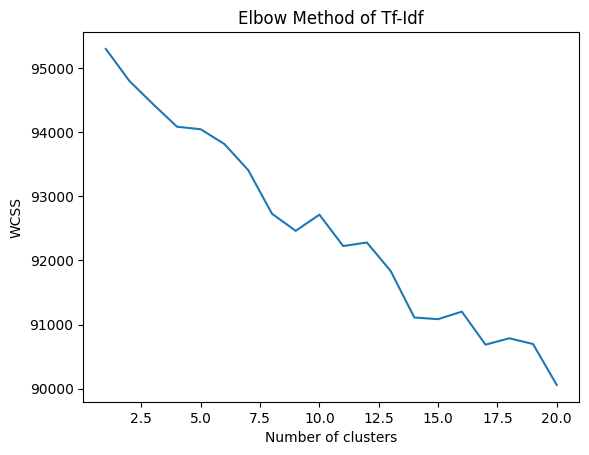

In [49]:
plt.plot(range(1,21),wcss)
plt.title('Elbow Method of Tf-Idf')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
print(words[250:300])

['deni' 'despit' 'destroy' 'detent' 'develop' 'die' 'director' 'disabl'
 'disast' 'discuss' 'diseas' 'dismiss' 'disput' 'doctor' 'dog' 'dollar'
 'domest' 'donald' 'donat' 'doubl' 'doubt' 'draw' 'drink' 'drive' 'driver'
 'drop' 'drought' 'drown' 'drug' 'drum' 'dump' 'dure' 'eagl' 'earli' 'eas'
 'east' 'econom' 'economi' 'edg' 'educ' 'effort' 'elder' 'elect' 'emerg'
 'end' 'energi' 'england' 'escap' 'evacu' 'evid']


In [51]:
N_clusters = [5, 10, 20]

for n in N_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X3)
    common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
    print("Number of clusters: ", n)
    for num, centroid in enumerate(common_words):
        print("cluster number" + str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    print('\n')


Number of clusters:  5
cluster number0 : offic, polic, charg, assault, shoot, box, court, man, guilti, post, chief, victoria, accus, nsw, investig, prison, protest, death, trade, raid, alleg, injur, shot, kill, attack
cluster number1 : polic, investig, man, probe, search, car, arrest, hunt, shoot, charg, drug, seek, death, crash, miss, assault, attack, fatal, driver, protest, raid, suspect, bodi, murder, new
cluster number2 : new, man, interview, plan, win, australia, charg, council, court, govt, australian, nsw, kill, report, death, sydney, face, year, fund, warn, open, urg, crash, chang, wa
cluster number3 : water, restrict, plan, suppli, irrig, council, use, price, urg, say, new, rise, resid, murray, boost, govt, save, sa, farmer, river, cut, face, project, fund, nsw
cluster number4 : say, need, polic, trump, labor, wont, minist, group, expert, mp, govt, plan, council, union, govern, australia, chang, tax, opposit, chief, pm, report, sa, wa, new


Number of clusters:  10
cluster num

Cluster  2  done
Cluster  3  done
Cluster  4  done
Cluster  5  done
Cluster  6  done
Cluster  7  done
Cluster  8  done
Cluster  9  done
Cluster  10  done
Cluster  11  done
Cluster  12  done
Cluster  13  done
Cluster  14  done
Cluster  15  done
Cluster  16  done
Cluster  17  done
Cluster  18  done
Cluster  19  done
Cluster  20  done


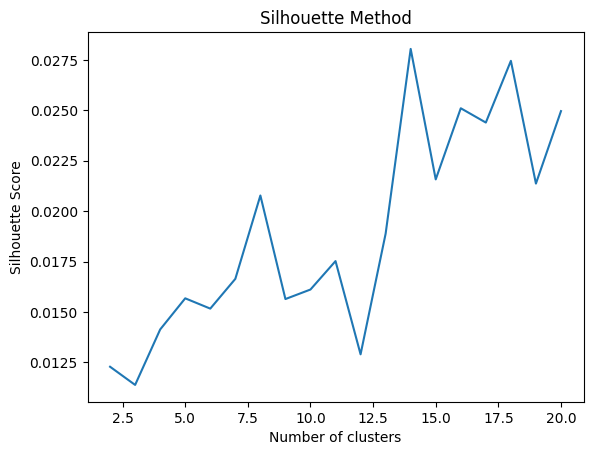

[0.012288882141996393, 0.01138767410985709, 0.014137293221366197, 0.01568044605203845, 0.015170354094554327, 0.01664498234344196, 0.02077782279667061, 0.015644546952207187, 0.016117025584722038, 0.017526313823863916, 0.01290429868155909, 0.0188851715622509, 0.028043731479639008, 0.021576313827731616, 0.025102404838726302, 0.02439373450171667, 0.02745278581694231, 0.021368520884382628, 0.02496107436021488]


In [47]:
# silhouette score
from sklearn.metrics import silhouette_score

sil = []
kmax = 21

for k in range(2, kmax):
    kmeans = KMeans(n_clusters = k).fit(X3)
    labels = kmeans.labels_
    sil.append(silhouette_score(X3, labels, metric = 'euclidean'))
    print('Cluster ', k, ' done')

plt.plot(range(2, kmax), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()

print(sil)

e:\Anaconda\envs\LMH\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
e:\Anaconda\envs\LMH\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 

Cluster  1  done
WCSS:  311189.3065018937
Cluster  2  done
WCSS:  309631.77935998235
Cluster  3  done
WCSS:  307620.906225428
Cluster  4  done
WCSS:  306851.1146299307
Cluster  5  done
WCSS:  304860.29423110926
Cluster  6  done
WCSS:  302436.30633499846
Cluster  7  done
WCSS:  299923.3243493099
Cluster  8  done
WCSS:  301370.3701704483
Cluster  9  done
WCSS:  302202.8520297635
Cluster  10  done
WCSS:  298318.15638099867
Cluster  11  done
WCSS:  297661.7314449998
Cluster  12  done
WCSS:  297731.45416166197
Cluster  13  done
WCSS:  297398.77101934387
Cluster  14  done
WCSS:  297046.9073245506
Cluster  15  done
WCSS:  295057.9743827145
Cluster  16  done
WCSS:  294430.6173236671
Cluster  17  done
WCSS:  291183.66387902456
Cluster  18  done
WCSS:  292841.9862602625
Cluster  19  done
WCSS:  292424.61735601095
Cluster  20  done
WCSS:  289032.2376639627


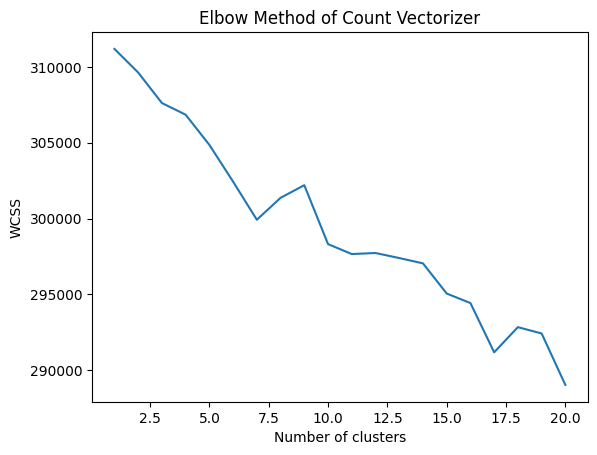

Number of clusters:  3
cluster number0 : new, zealand, year, polic, plan, case, law, open, australia, council, nsw, home, coronavirus, health, record, hospit, launch, say, wa, covid, south, announc, help, look, set
cluster number1 : face, famili, need, court, charg, man, say, murder, death, accus, polic, drug, trial, child, fund, help, assault, australia, water, ban, australian, home, victim, nsw, crash
cluster number2 : polic, man, say, plan, australia, council, charg, win, govt, nsw, kill, death, court, australian, report, crash, sydney, fund, warn, urg, wa, attack, year, water, chang


Number of clusters:  5
cluster number0 : wa, govt, polic, countri, hour, elect, say, farmer, premier, govern, labor, cyclon, coast, liber, nation, report, coronavirus, face, plan, warn, minist, region, south, state, west
cluster number1 : health, mental, servic, new, minist, worker, fund, indigen, say, qld, warn, doctor, govt, plan, hospit, concern, report, urg, risk, boost, job, rural, sa, studi, car

In [50]:
# do again with count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer4 = CountVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)
X4 = vectorizer4.fit_transform(desc)
words2 = vectorizer4.get_feature_names_out()

wcss2 = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X4)
    wcss2.append(kmeans.inertia_)
    print('Cluster ', i, ' done')
    print('WCSS: ', kmeans.inertia_)

plt.plot(range(1,21),wcss2)
plt.title('Elbow Method of Count Vectorizer')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

N_clusters = [3, 5, 7, 10, 15]

for n in N_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X4)
    common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
    print("Number of clusters: ", n)
    for num, centroid in enumerate(common_words):
        print("cluster number" + str(num) + ' : ' + ', '.join(words2[word] for word in centroid))
    print('\n')
